# Data Augmentation

In [46]:
import pandas as pd
import numpy as np
from scipy.interpolate import interp1d # For interpolation

## 스플라인 보간

In [19]:
import pandas as pd
import numpy as np

# 데이터 파일 읽어오기
df = pd.read_csv('HPD_0416.csv')

# 'Date' 열의 데이터 타입을 datetime으로 변환
df['Date'] = pd.to_datetime(df['Date'])

# 각 제품별로 데이터 증강을 수행할 것이므로, 빈 리스트를 생성
augmented_data = []
augmented_df = pd.DataFrame()

# 모든 제품 코드에 대해 데이터 증강을 수행
for product_code in df['Product_Code'].unique():
    
    # 현재 제품 코드에 해당하는 데이터만 추출
    product_df = df[df['Product_Code'] == product_code]

    # 'Date' 열을 인덱스로 설정한 다음, 3시간 간격으로 리샘플링
    product_df = product_df.set_index('Date').asfreq('3H')
    
    # 제품 코드와 카테고리 정보를 채워 넣습니다. (ffill을 사용하여 이전 값으로 채우기)
    product_df['Product_Code'] = product_code
    product_df['Product_Category'] = product_df['Product_Category'].ffill()
    
    # 선형 보간법을 사용하여 'Order_Demand' 열의 빈 셀을 채웁니다.
    #product_df['Order_Demand'] = product_df['Order_Demand'].interpolate(method='spline', order=1)
    product_df['Order_Demand'] = product_df['Order_Demand'].interpolate(method='linear')
    # 증강된 데이터를 하나의 데이터프레임으로 결합합니다.
    augmented_df = pd.concat([augmented_df,product_df])
    
augmented_df = augmented_df.reset_index()

In [18]:
df['Product_Code'].unique()

array(['Product_0025', 'Product_0739', 'Product_0901', 'Product_1154',
       'Product_1248', 'Product_1295', 'Product_1378', 'Product_2004'],
      dtype=object)

## Kernel Func. (Gaussian) 보간

In [27]:
import pandas as pd
import numpy as np
from scipy.interpolate import Rbf

# 데이터 파일 읽어오기
df = pd.read_csv('HPD_0416.csv')

# 'Date' 열의 데이터 타입을 datetime으로 변환
df['Date'] = pd.to_datetime(df['Date'])

# 각 제품별로 데이터 증강을 수행할 것이므로, 빈 리스트를 생성
augmented_data = []
augmented_df = pd.DataFrame()

# 모든 제품 코드에 대해 데이터 증강을 수행
for product_code in df['Product_Code'].unique():
    
    # 현재 제품 코드에 해당하는 데이터만 추출
    product_df = df[df['Product_Code'] == product_code]

    # 'Date' 열을 인덱스로 설정한 다음, 3시간 간격으로 리샘플링
    product_df = product_df.set_index('Date').asfreq('3H')
    
#     # 제품 코드와 카테고리 정보를 채워 넣습니다. (ffill을 사용하여 이전 값으로 채우기)
    product_df['Product_Code'] = product_code
    product_df['Product_Category'] = product_df['Product_Category'].ffill()
    
    # 가우시안 함수 보간법을 사용하여 'Order_Demand' 열의 빈 셀을 채웁니다.
    known_dates = product_df.index[~product_df['Order_Demand'].isna()]
    known_demands = product_df.loc[known_dates, 'Order_Demand']
    missing_dates = product_df.index[product_df['Order_Demand'].isna()]
    
    rbf = Rbf(known_dates, known_demands, function= 'linear')
    interpolated_demands = rbf(missing_dates)
    
    # 음수 값을 0으로 설정
    #interpolated_demands = np.maximum(interpolated_demands, 0)
    product_df.loc[missing_dates, 'Order_Demand'] = interpolated_demands

    # 증강된 데이터를 하나의 데이터프레임으로 결합합니다.
    augmented_df = pd.concat([augmented_df, product_df])

augmented_df = augmented_df.reset_index()

In [11]:
known_dates

DatetimeIndex(['2012-01-06', '2012-01-07', '2012-01-08', '2012-01-09',
               '2012-01-10', '2012-01-11', '2012-01-12', '2012-01-13',
               '2012-01-14', '2012-01-15',
               ...
               '2016-12-18', '2016-12-19', '2016-12-20', '2016-12-21',
               '2016-12-22', '2016-12-23', '2016-12-24', '2016-12-25',
               '2016-12-26', '2016-12-27'],
              dtype='datetime64[ns]', name='Date', length=1818, freq=None)

In [21]:
product_df[product_df['Order_Demand']<0]

,Product_Code,Product_Category,Order_Demand
Date,,,


In [22]:
product_df.head(50)

,Product_Code,Product_Category,Order_Demand
Date,,,
2012-01-06 00:00:00,Product_2004,Category_005,2000.0
2012-01-06 03:00:00,Product_2004,Category_005,1750.0
2012-01-06 06:00:00,Product_2004,Category_005,1500.0
2012-01-06 09:00:00,Product_2004,Category_005,1250.0
2012-01-06 12:00:00,Product_2004,Category_005,1000.0
2012-01-06 15:00:00,Product_2004,Category_005,750.0
2012-01-06 18:00:00,Product_2004,Category_005,500.0
2012-01-06 21:00:00,Product_2004,Category_005,250.0
2012-01-07 00:00:00,Product_2004,Category_005,0.0


In [14]:
product_df.head(50)

,Product_Code,Product_Category,Order_Demand
Date,,,
2012-01-06 00:00:00,Product_2004,Category_005,2000.000000
2012-01-06 03:00:00,Product_2004,Category_005,1743.661167
2012-01-06 06:00:00,Product_2004,Category_005,1468.009694
2012-01-06 09:00:00,Product_2004,Category_005,1182.040926
2012-01-06 12:00:00,Product_2004,Category_005,896.919417
2012-01-06 15:00:00,Product_2004,Category_005,624.922341
2012-01-06 18:00:00,Product_2004,Category_005,378.175305
2012-01-06 21:00:00,Product_2004,Category_005,167.281705
2012-01-07 00:00:00,Product_2004,Category_005,0.000000


In [9]:
known_dates

DatetimeIndex(['2012-01-06', '2012-01-07', '2012-01-08', '2012-01-09',
               '2012-01-10', '2012-01-11', '2012-01-12', '2012-01-13',
               '2012-01-14', '2012-01-15',
               ...
               '2016-12-18', '2016-12-19', '2016-12-20', '2016-12-21',
               '2016-12-22', '2016-12-23', '2016-12-24', '2016-12-25',
               '2016-12-26', '2016-12-27'],
              dtype='datetime64[ns]', name='Date', length=1818, freq=None)

In [23]:
augmented_df.to_csv('HPD_Augmented_0429.csv', index=False)

In [1]:
import pandas as pd
import numpy as np
from pykrige.ok import OrdinaryKriging

# 데이터 파일 읽어오기
df = pd.read_csv('HPD_0416.csv')

# 'Date' 열의 데이터 타입을 datetime으로 변환
df['Date'] = pd.to_datetime(df['Date'])

# 각 제품별로 데이터 증강을 수행할 것이므로, 빈 리스트를 생성
augmented_data = []
augmented_df = pd.DataFrame()

# 모든 제품 코드에 대해 데이터 증강을 수행
for product_code in df['Product_Code'].unique():
    
    # 현재 제품 코드에 해당하는 데이터만 추출
    product_df = df[df['Product_Code'] == product_code]

    # 'Date' 열을 인덱스로 설정한 다음, 3시간 간격으로 리샘플링
    product_df = product_df.set_index('Date').asfreq('3H')
    
    # 제품 코드와 카테고리 정보를 채워 넣습니다. (ffill을 사용하여 이전 값으로 채우기)
    product_df['Product_Code'] = product_code
    product_df['Product_Category'] = product_df['Product_Category'].ffill()
    
    # Kriging 보간법을 사용하여 'Order_Demand' 열의 빈 셀을 채웁니다.
    known_points = product_df.dropna(subset=['Order_Demand']).reset_index()
    missing_points = product_df.reset_index()[['Date', 'Order_Demand']].dropna()
    
    OK = OrdinaryKriging(
        known_points['Date'].astype(np.int64) // 10**9,
        np.zeros(len(known_points)),
        known_points['Order_Demand'],
        variogram_model='gaussian',
        verbose=True
    )
    
    interpolated_demands, _ = OK.execute(
        'grid',
        missing_points['Date'].astype(np.int64) // 10**9,
        np.zeros(len(missing_points))
    )

    # 음수 값을 0으로 설정
    interpolated_demands = np.maximum(interpolated_demands, 0)
    product_df.loc[missing_points.index, 'Order_Demand'] = interpolated_demands

    # 증강된 데이터를 하나의 데이터프레임으로 결합합니다.
    augmented_df = pd.concat([augmented_df, product_df])

augmented_df = augmented_df.reset_index()


Adjusting data for anisotropy...
Initializing variogram model...
Coordinates type: 'euclidean' 

Using 'gaussian' Variogram Model
Partial Sill: 156750.73579208713
Full Sill: 954875.0643585426
Range: 87194.65045104522
Nugget: 798124.3285664554 

Calculating statistics on variogram model fit...
Executing Ordinary Kriging...



MemoryError: Unable to allocate 45.6 GiB for an array with shape (3345241, 1829) and data type float64

In [1]:
import pandas as pd
import numpy as np
from scipy.interpolate import Rbf

# 데이터 파일 읽어오기
df = pd.read_csv('HPD_0416.csv')

# 'Date' 열의 데이터 타입을 datetime으로 변환
df['Date'] = pd.to_datetime(df['Date'])

# 각 제품별로 데이터 증강을 수행할 것이므로, 빈 리스트를 생성
augmented_data = []
augmented_df = pd.DataFrame()

# 모든 제품 코드에 대해 데이터 증강을 수행
for product_code in df['Product_Code'].unique():
    
    # 현재 제품 코드에 해당하는 데이터만 추출
    product_df = df[df['Product_Code'] == product_code]

    # 'Date' 열을 인덱스로 설정한 다음, 3시간 간격으로 리샘플링
    product_df = product_df.set_index('Date').asfreq('3H')
    
    # 제품 코드와 카테고리 정보를 채워 넣습니다. (ffill을 사용하여 이전 값으로 채우기)
    product_df['Product_Code'] = product_code
    product_df['Product_Category'] = product_df['Product_Category'].ffill()
    
    # 가우시안 함수 보간법을 사용하여 'Order_Demand' 열의 빈 셀을 채웁니다.
    known_dates = product_df.index[~product_df['Order_Demand'].isna()]
    known_demands = product_df.loc[known_dates, 'Order_Demand']
    missing_dates = product_df.index[product_df['Order_Demand'].isna()]
    
    rbf = Rbf(known_dates, known_demands, function='gaussian')
    interpolated_demands = rbf(missing_dates)
    
    # 음수 값을 0으로 설정
    interpolated_demands = np.maximum(interpolated_demands, 0)
    product_df.loc[missing_dates, 'Order_Demand'] = interpolated_demands

    # 증강된 데이터를 하나의 데이터프레임으로 결합합니다.
    augmented_df = pd.concat([augmented_df, product_df])

augmented_df = augmented_df.reset_index()

SyntaxError: invalid syntax (2305333808.py, line 45)

In [58]:
# 필요한 라이브러리를 불러옵니다.
import pandas as pd
import numpy as np
from pykrige.ok import OrdinaryKriging
import datetime
# 소수점 뒤에 표시할 자릿수를 설정합니다. 예를 들어 소수점 두 자리까지 표시하려면 '{:.2f}'를 사용합니다.
pd.options.display.float_format = '{:.2f}'.format

# 데이터 파일을 읽어옵니다.
df = pd.read_csv('HPD_0416.csv')

# 'Date' 열의 데이터 타입을 datetime으로 변환합니다.
df['Date'] = pd.to_datetime(df['Date'])

# 각 제품별로 데이터 증강을 수행할 것이므로, 빈 데이터프레임을 생성합니다.
augmented_df = pd.DataFrame()

# 모든 제품 코드에 대해 데이터 증강을 수행합니다.
for product_code in df['Product_Code'].unique():
    
    # 현재 제품 코드에 해당하는 데이터만 추출합니다.
    product_df = df[df['Product_Code'] == product_code]

    # 'Date' 열을 인덱스로 설정한 다음, 3시간 간격으로 리샘플링합니다.
    product_df = product_df.set_index('Date').asfreq('3H')
    
    # 제품 코드와 카테고리 정보를 채워 넣습니다. (ffill을 사용하여 이전 값으로 채우기)
    product_df['Product_Code'] = product_code
    product_df['Product_Category'] = product_df['Product_Category'].ffill()
    
    # Kriging을 사용하여 'Order_Demand' 열의 빈 셀을 채울 것입니다.
    # 우선 누락된 값이 없는 날짜와 그에 해당하는 수요를 추출합니다.
    known_dates = product_df.index[~product_df['Order_Demand'].isna()]
    known_demands = product_df.loc[known_dates, 'Order_Demand']
    
    # 누락된 값이 있는 날짜를 추출합니다.
    missing_dates = product_df.index[product_df['Order_Demand'].isna()]
    
    # Kriging을 위해 날짜를 숫자로 변환합니다. (1970년 1월 1일을 기준으로 초 단위로 표현)
    known_dates_numeric = pd.Series(np.arange(0,len(known_dates)).astype('float64'))
    missing_dates_numeric = pd.Series(np.arange(0,len(missing_dates)).astype('float64'))
    
    # Kriging을 수행합니다. 여기서는 선형 변동 모델을 사용합니다.
    ok = OrdinaryKriging(known_dates_numeric,
                     np.zeros_like(known_dates_numeric),
                     known_demands,
                     variogram_model='gaussian')
    
    # 보간된 값을 계산합니다.
    interpolated_demands, _ = ok.execute('points', 
                                         missing_dates_numeric,
                                         np.zeros_like(missing_dates_numeric))
    
    # 음수 값을 0으로 설정합니다. (수요가 음수가 될 수 없으므로)
    #interpolated_demands = np.maximum(interpolated_demands, 0)
    
        # 보간된 수요 값을 누락된 날짜에 채웁니다.
    product_df.loc[missing_dates, 'Order_Demand'] = interpolated_demands

    # 증강된 데이터를 하나의 데이터프레임으로 결합합니다.
    augmented_df = pd.concat([augmented_df, product_df])

# 인덱스를 초기화하고 최종적으로 증강된 데이터프레임을 출력합니다.
gau_augmented_df = augmented_df.reset_index()
#augmented_df['Order_Demand'] = augmented_df['Order_Demand'].astype('int')

In [53]:
missing_dates

DatetimeIndex(['2012-01-06 03:00:00', '2012-01-06 06:00:00',
               '2012-01-06 09:00:00', '2012-01-06 12:00:00',
               '2012-01-06 15:00:00', '2012-01-06 18:00:00',
               '2012-01-06 21:00:00', '2012-01-07 03:00:00',
               '2012-01-07 06:00:00', '2012-01-07 09:00:00',
               ...
               '2016-12-25 15:00:00', '2016-12-25 18:00:00',
               '2016-12-25 21:00:00', '2016-12-26 03:00:00',
               '2016-12-26 06:00:00', '2016-12-26 09:00:00',
               '2016-12-26 12:00:00', '2016-12-26 15:00:00',
               '2016-12-26 18:00:00', '2016-12-26 21:00:00'],
              dtype='datetime64[ns]', name='Date', length=12719, freq=None)

In [10]:
len(known_dates)

1818

In [16]:
pd.Series(np.arange(0,len(known_dates)))

0          0
1          1
2          2
3          3
4          4
        ... 
1813    1813
1814    1814
1815    1815
1816    1816
1817    1817
Length: 1818, dtype: int32

In [24]:
dd = pd.read_csv('HPD_Augmented_0416.csv')

In [50]:
spherical_augmented_df

,Date,Product_Code,Product_Category,Order_Demand
0,2012-01-05 00:00:00,Product_0025,Category_005,1600.00
1,2012-01-05 03:00:00,Product_0025,Category_005,1600.00
2,2012-01-05 06:00:00,Product_0025,Category_005,1000.00
3,2012-01-05 09:00:00,Product_0025,Category_005,0.00
4,2012-01-05 12:00:00,Product_0025,Category_005,0.00
...,...,...,...,...
116387,2016-12-26 12:00:00,Product_2004,Category_005,746.42
116388,2016-12-26 15:00:00,Product_2004,Category_005,746.42
116389,2016-12-26 18:00:00,Product_2004,Category_005,746.42
116390,2016-12-26 21:00:00,Product_2004,Category_005,746.42


In [57]:
linear_augmented_df

,Date,Product_Code,Product_Category,Order_Demand
0,2012-01-05 00:00:00,Product_0025,Category_005,1600.00
1,2012-01-05 03:00:00,Product_0025,Category_005,1600.00
2,2012-01-05 06:00:00,Product_0025,Category_005,1000.00
3,2012-01-05 09:00:00,Product_0025,Category_005,0.00
4,2012-01-05 12:00:00,Product_0025,Category_005,0.00
...,...,...,...,...
116387,2016-12-26 12:00:00,Product_2004,Category_005,746.42
116388,2016-12-26 15:00:00,Product_2004,Category_005,746.42
116389,2016-12-26 18:00:00,Product_2004,Category_005,746.42
116390,2016-12-26 21:00:00,Product_2004,Category_005,746.42


In [52]:
augmented_df

,Product_Code,Product_Category,Order_Demand
Date,,,
2012-01-05 00:00:00,Product_0025,Category_005,1600.00
2012-01-05 03:00:00,Product_0025,Category_005,1600.00
2012-01-05 06:00:00,Product_0025,Category_005,1000.00
2012-01-05 09:00:00,Product_0025,Category_005,0.00
2012-01-05 12:00:00,Product_0025,Category_005,0.00
...,...,...,...
2016-12-26 12:00:00,Product_2004,Category_005,746.42
2016-12-26 15:00:00,Product_2004,Category_005,746.42
2016-12-26 18:00:00,Product_2004,Category_005,746.42


In [4]:
augmented_df

,Date,Product_Code,Product_Category,Order_Demand
0,2012-01-05 00:00:00,Product_0025,Category_005,1600.000000
1,2012-01-05 03:00:00,Product_0025,Category_005,680.202349
2,2012-01-05 06:00:00,Product_0025,Category_005,619.184691
3,2012-01-05 09:00:00,Product_0025,Category_005,570.208355
4,2012-01-05 12:00:00,Product_0025,Category_005,549.737065
...,...,...,...,...
116387,2016-12-26 12:00:00,Product_2004,Category_005,1093.060371
116388,2016-12-26 15:00:00,Product_2004,Category_005,1083.428372
116389,2016-12-26 18:00:00,Product_2004,Category_005,1073.849104
116390,2016-12-26 21:00:00,Product_2004,Category_005,1064.331899


In [25]:
dd.head(60)

,Date,Product_Code,Product_Category,Order_Demand
0,2012-01-05 00:00:00,Product_0025,Category_005,1600.000000
1,2012-01-05 03:00:00,Product_0025,Category_005,1633.403702
2,2012-01-05 06:00:00,Product_0025,Category_005,1628.665789
3,2012-01-05 09:00:00,Product_0025,Category_005,1587.586651
4,2012-01-05 12:00:00,Product_0025,Category_005,1513.949924
5,2012-01-05 15:00:00,Product_0025,Category_005,1412.788937
6,2012-01-05 18:00:00,Product_0025,Category_005,1289.690351
7,2012-01-05 21:00:00,Product_0025,Category_005,1150.285882
8,2012-01-06 00:00:00,Product_0025,Category_005,1000.000000
9,2012-01-06 03:00:00,Product_0025,Category_005,844.027064


In [ ]:
product_code

In [ ]:
known_dates

In [ ]:
known_demands

In [21]:
augmented_df.groupby('Product_Code').get_group('Product_2004').head(30)

,Date,Product_Code,Product_Category,Order_Demand
101855,2012-01-06 00:00:00,Product_2004,Category_005,2000.000000
101856,2012-01-06 03:00:00,Product_2004,Category_005,802.368152
101857,2012-01-06 06:00:00,Product_2004,Category_005,802.685128
101858,2012-01-06 09:00:00,Product_2004,Category_005,802.999474
101859,2012-01-06 12:00:00,Product_2004,Category_005,803.311153
101860,2012-01-06 15:00:00,Product_2004,Category_005,803.620128
101861,2012-01-06 18:00:00,Product_2004,Category_005,803.926362
101862,2012-01-06 21:00:00,Product_2004,Category_005,804.229817
101863,2012-01-07 00:00:00,Product_2004,Category_005,0.000000
101864,2012-01-07 03:00:00,Product_2004,Category_005,804.828246


In [14]:
augmented_df.groupby('Product_Code').get_group('Product_2004').head(30)

,Date,Product_Code,Product_Category,Order_Demand
101855,2012-01-06 00:00:00,Product_2004,Category_005,2000.000000
101856,2012-01-06 03:00:00,Product_2004,Category_005,619.089665
101857,2012-01-06 06:00:00,Product_2004,Category_005,615.943426
101858,2012-01-06 09:00:00,Product_2004,Category_005,612.891317
101859,2012-01-06 12:00:00,Product_2004,Category_005,609.942081
101860,2012-01-06 15:00:00,Product_2004,Category_005,607.104505
101861,2012-01-06 18:00:00,Product_2004,Category_005,604.387410
101862,2012-01-06 21:00:00,Product_2004,Category_005,601.799625
101863,2012-01-07 00:00:00,Product_2004,Category_005,0.000000
101864,2012-01-07 03:00:00,Product_2004,Category_005,597.047210


INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should

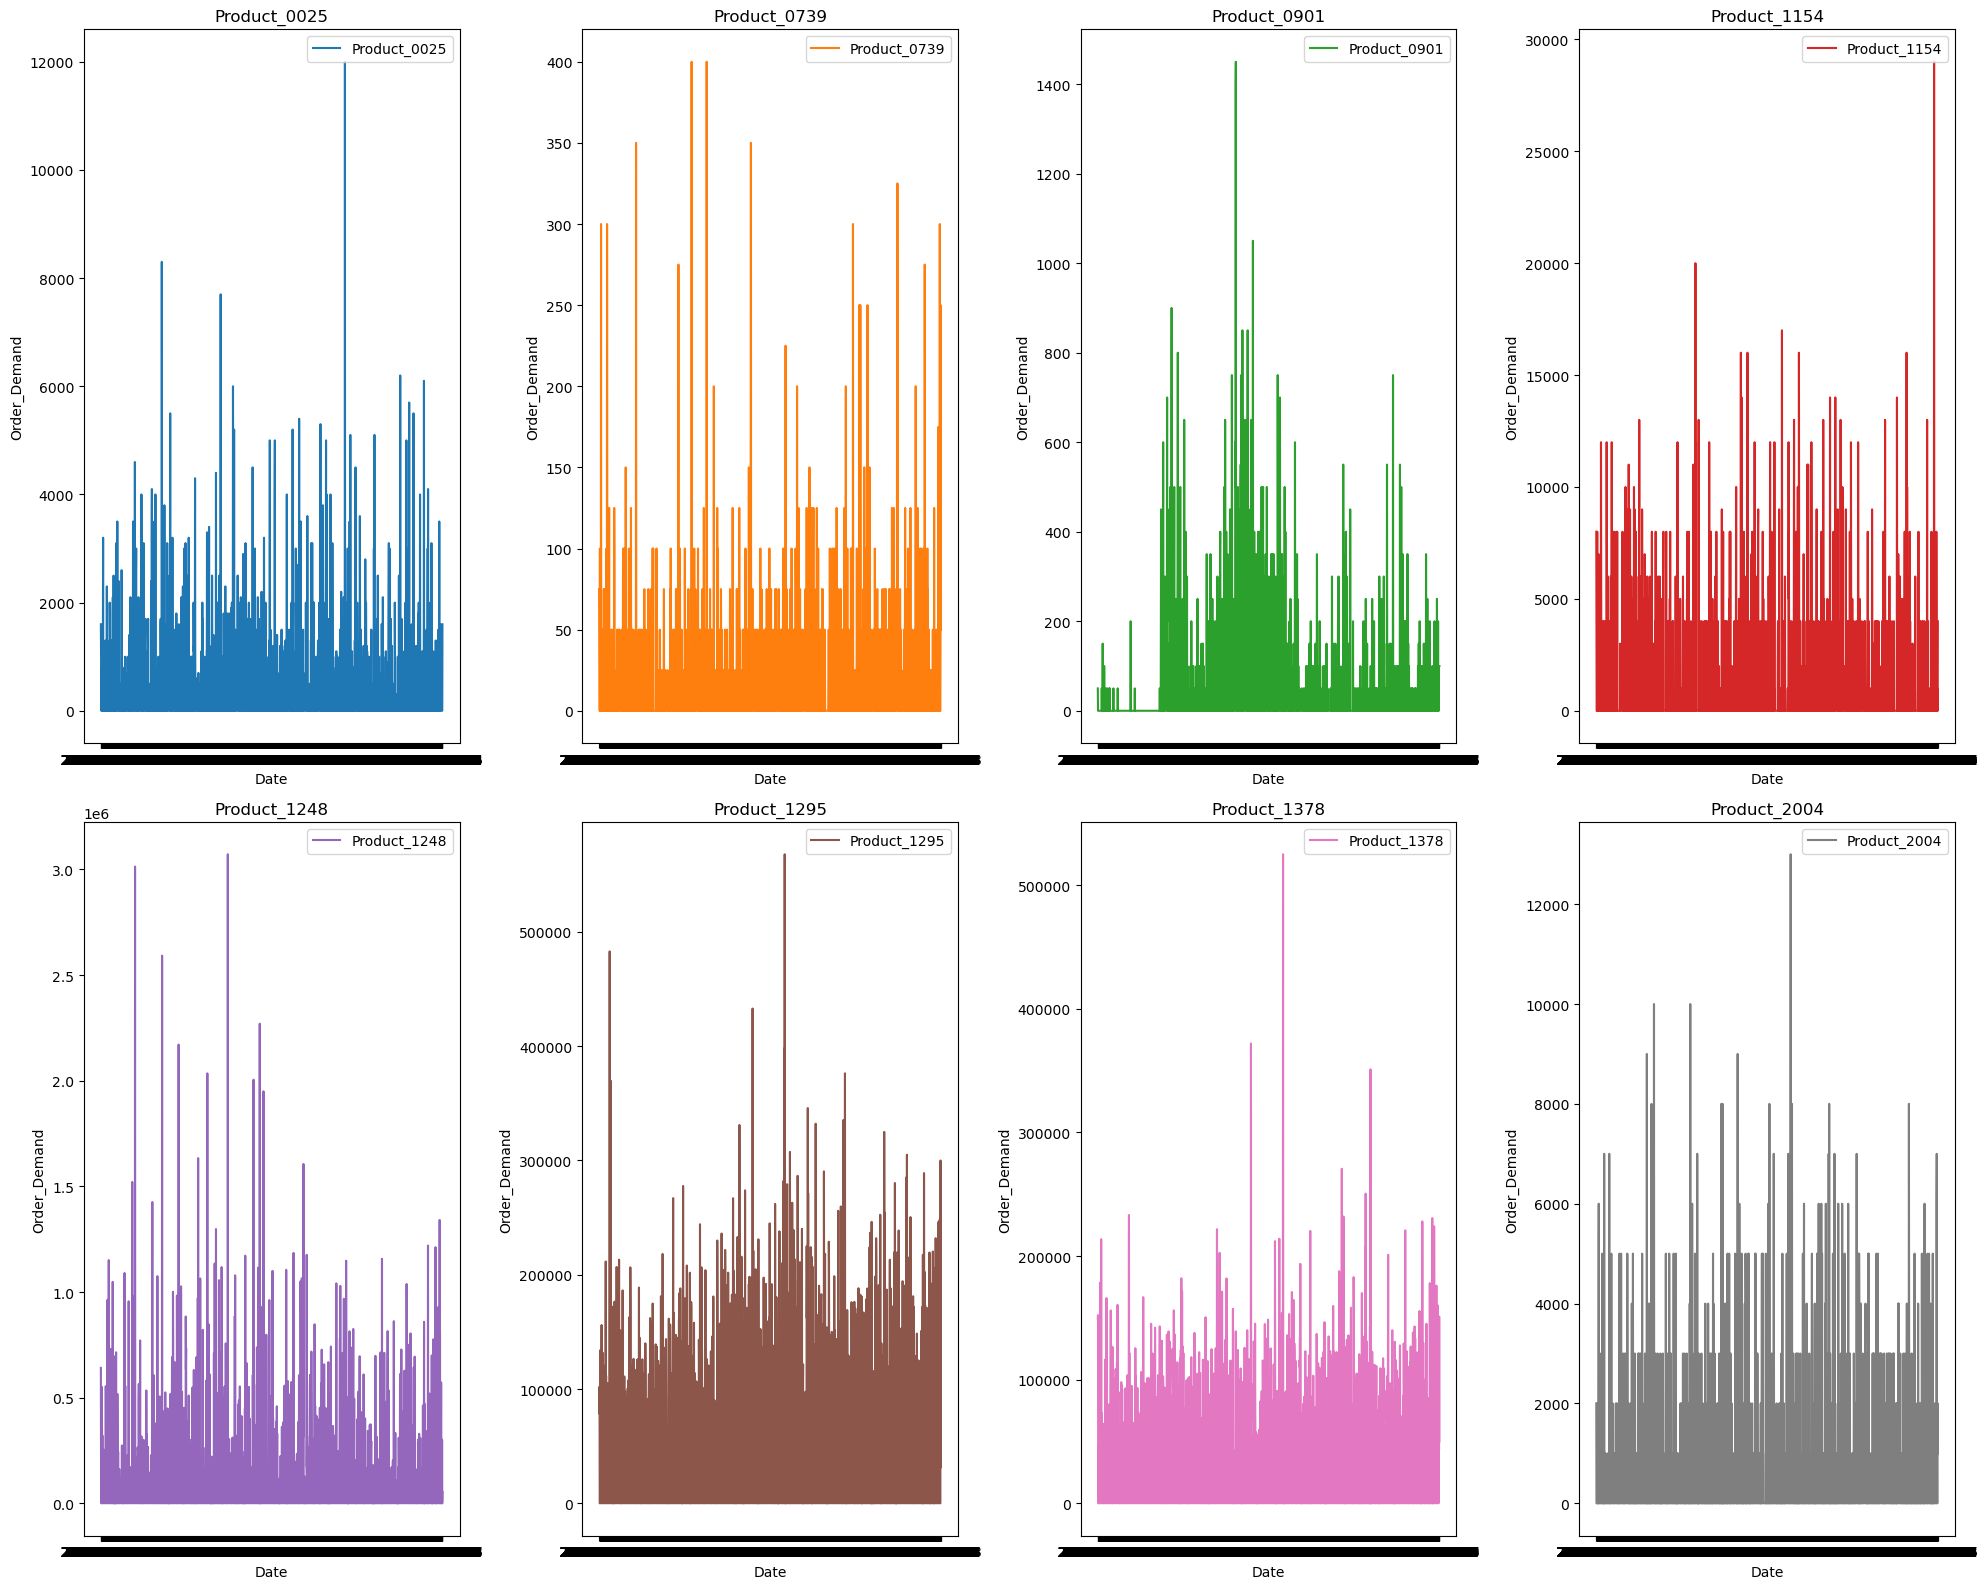

In [48]:
def plot_time(df):
    
    fig, axs = plt.subplots(2, 4, figsize=(20, 16))
    
    for idx, code in enumerate(df['Product_Code'].unique()):
        row, col = idx // 4, idx % 4
        tmp_df = df[df['Product_Code'] == code][['Date', 'Order_Demand']]
        axs[row, col].plot(tmp_df['Date'], tmp_df['Order_Demand'], label=code, color=f'C{idx}')
        axs[row, col].set_title(code)
        axs[row, col].set_xlabel('Date')
        axs[row, col].set_ylabel('Order_Demand')
        axs[row, col].legend()

    fig.tight_layout()
    plt.show()

# 상위 15개 품목의 시계열 그래프 그리기
plot_time(df)

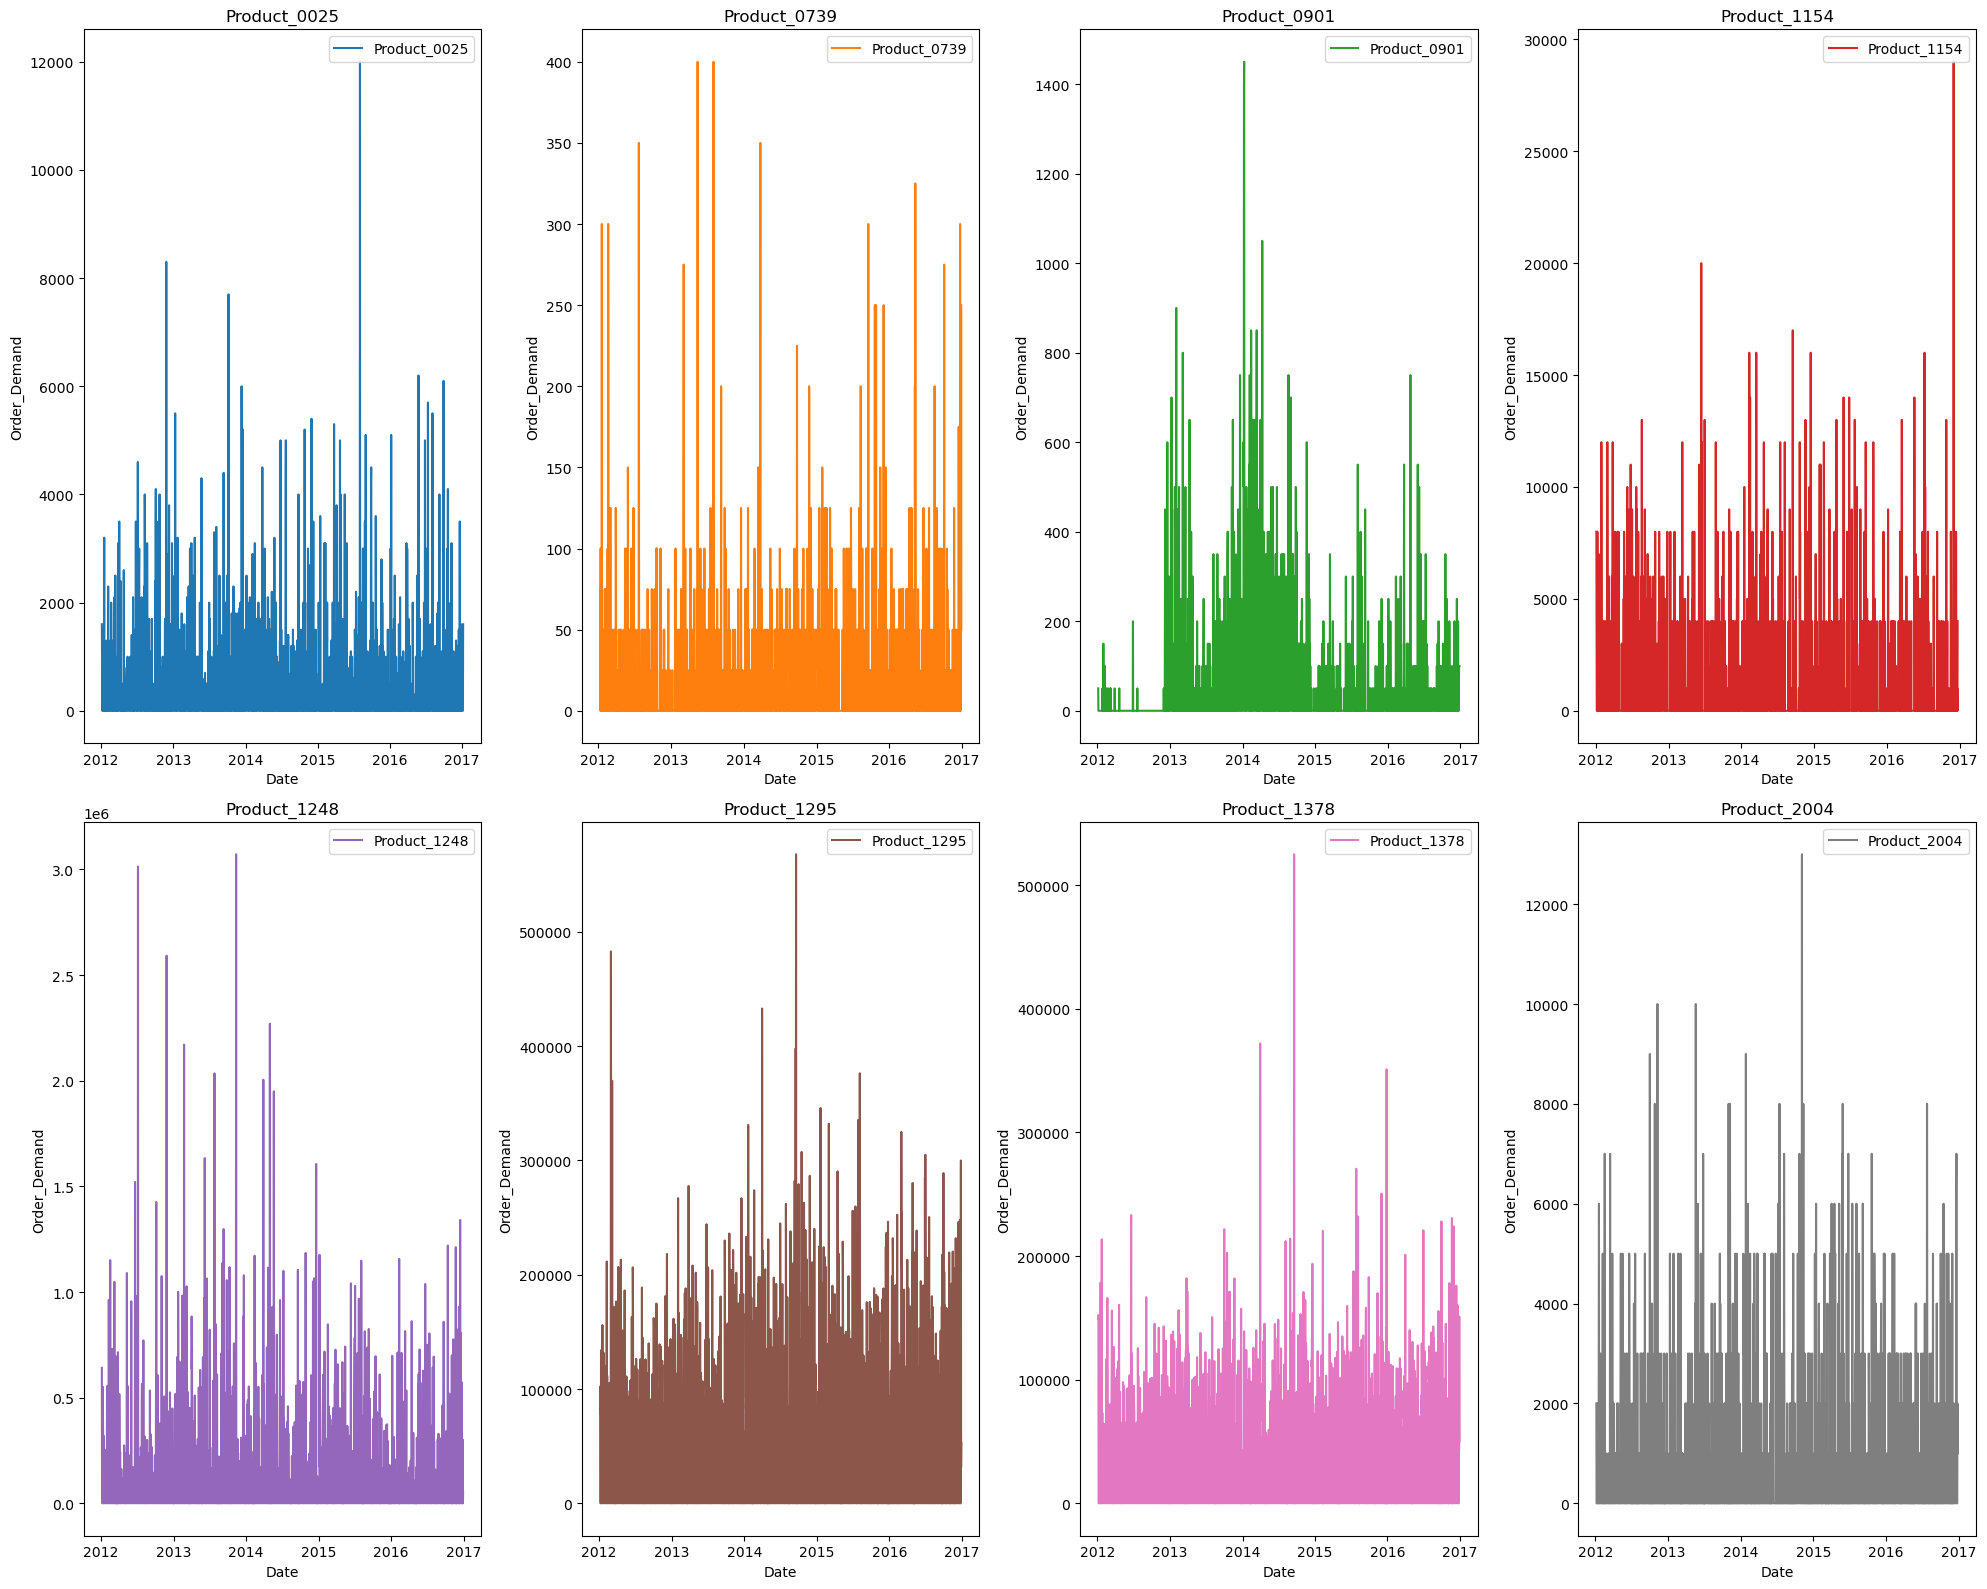

In [6]:
import matplotlib.pyplot as plt

def plot_time(augmented_df):
    
    fig, axs = plt.subplots(2, 4, figsize=(20, 16))
    
    for idx, code in enumerate(df['Product_Code'].unique()):
        row, col = idx // 4, idx % 4
        tmp_df = df[df['Product_Code'] == code][['Date', 'Order_Demand']]
        axs[row, col].plot(tmp_df['Date'], tmp_df['Order_Demand'], label=code, color=f'C{idx}')
        axs[row, col].set_title(code)
        axs[row, col].set_xlabel('Date')
        axs[row, col].set_ylabel('Order_Demand')
        axs[row, col].legend()

    fig.tight_layout()
    plt.show()

# 상위 15개 품목의 시계열 그래프 그리기
plot_time(df)

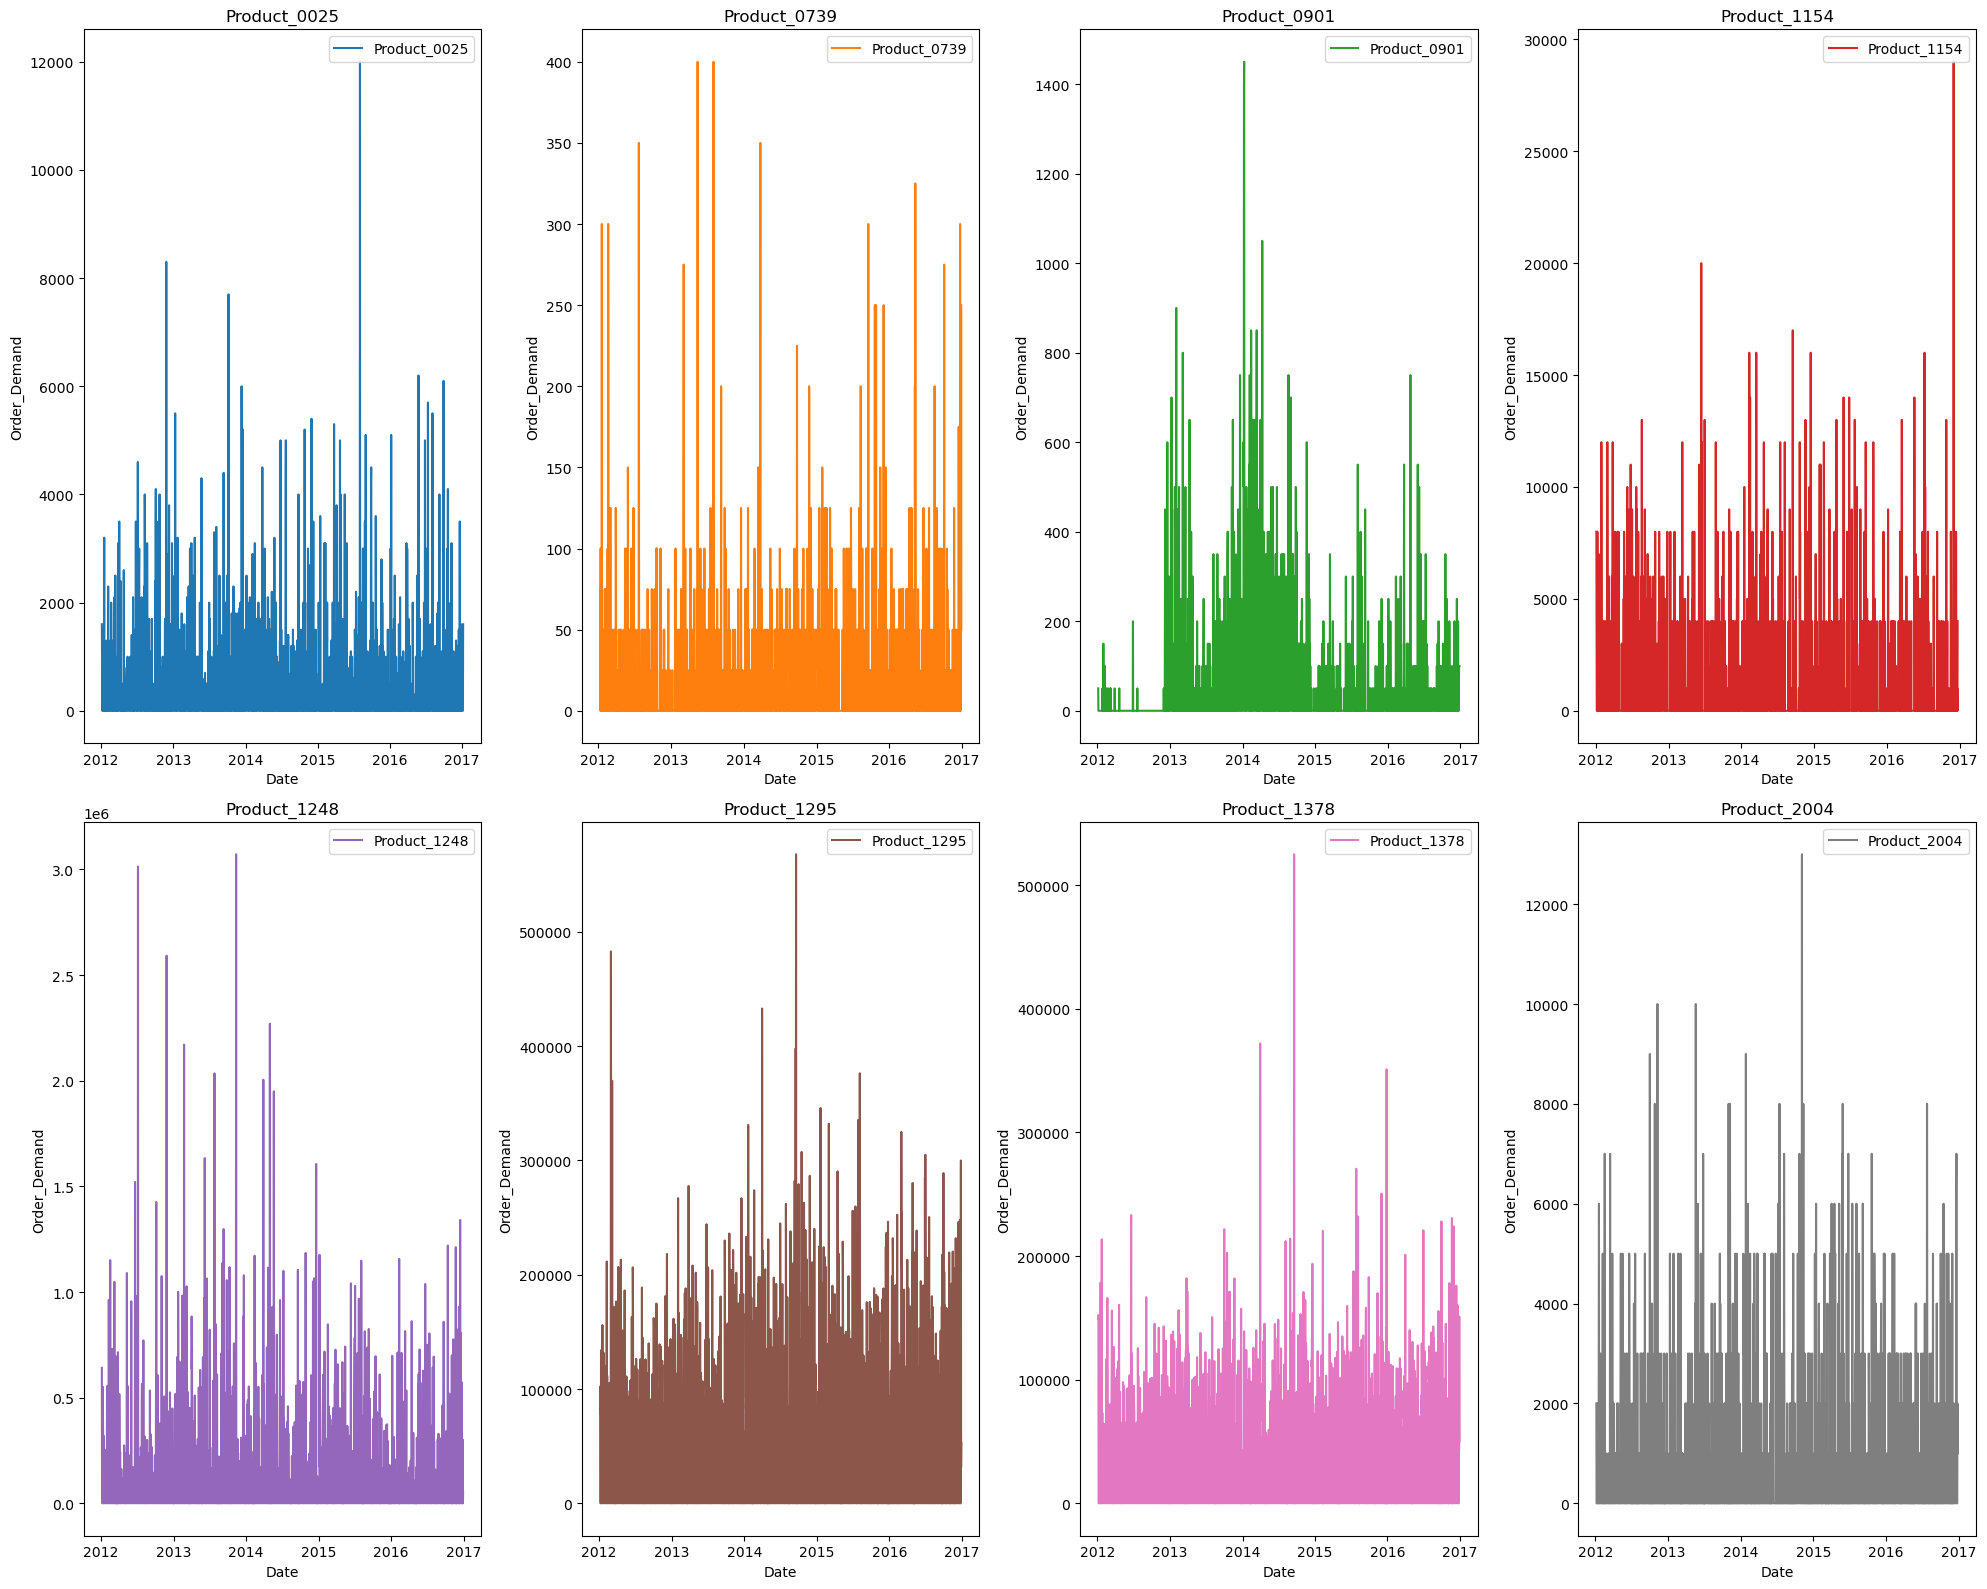

In [8]:
plot_time(augmented_df)